# Max iterations grapfic

In [11]:
# read csv max_iter.csv
import pandas as pd

df = pd.DataFrame(pd.read_csv('max_iter.csv'))

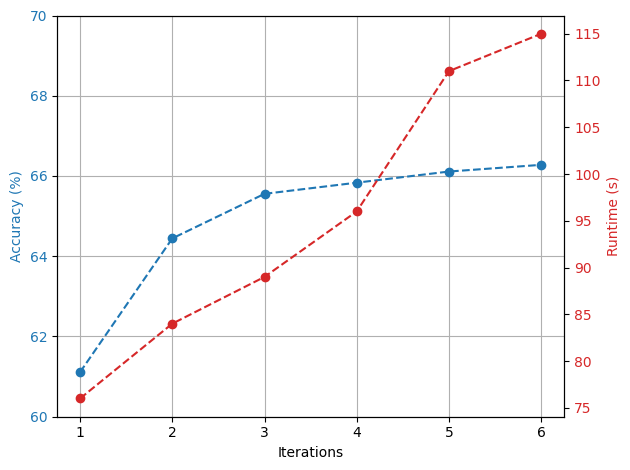

In [12]:
df['Percentage of Correct Migrations'] = df['Percentage of Correct Migrations'].str.replace(',', '.').astype(float) * 100

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Accuracy (%)', color=color)
ax1.plot(df['Max Number of Iterations'], df['Percentage of Correct Migrations'], color=color, linestyle='--', marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(60, 70)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Runtime (s)', color=color)
ax2.plot(df['Max Number of Iterations'], df['Runtime'], color=color, linestyle='--', marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
ax1.grid(True)
plt.show()


# Temperature

In [19]:
import pandas as pd

df_temp = pd.DataFrame(pd.read_csv('temperature.csv'))
df_temp.head()

,Model Temperature,accuracy\n
0,0,"0,675"
1,"0,02","0,6583333333"
2,"0,05","0,6572222222"
3,"0,1","0,6472222222"
4,"0,15","0,6427777778"


In [21]:
df_temp['accuracy\n'] = df_temp['accuracy\n'].str.replace(',', '.').astype(float) * 100

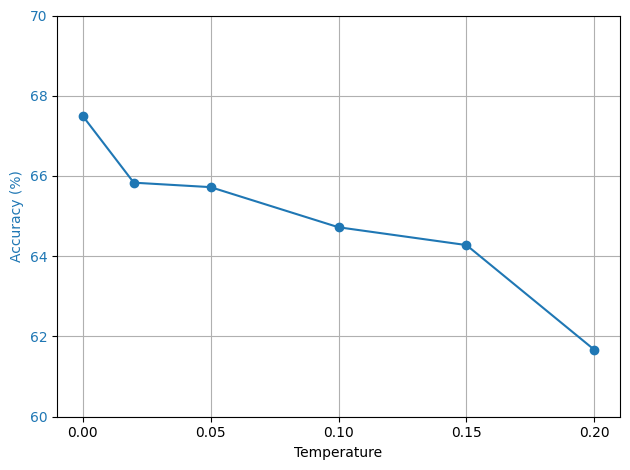

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Accuracy (%)', color=color)
x_values = df_temp['Model Temperature'].str.replace(',', '.').astype(float).round(2)
ax1.plot(x_values, df_temp['accuracy\n'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(60, 70)

# Set x-axis labels every 0.05
ax1.xaxis.set_major_locator(MultipleLocator(0.05))
# Format x-axis labels to show two decimals
ax1.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.2f}'))

fig.tight_layout()
ax1.grid(True)

plt.show()